In [1]:
# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser
# from persim import plot_diagrams
import persim
# import persim.plot

# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
print(2)

2


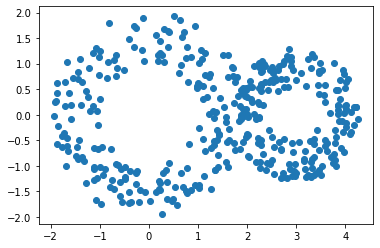

In [2]:
# Make a quick double annulus

def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) 
plt.scatter(P[:,0], P[:,1])

In [11]:
# Make three example point clouds 
r = 1
R = 2
P1 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) # teaspoon data generation
P2 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
P2[:,1] += 6
P3 = DoubleAnnulus()
P3 *= 1.1
P3[:,0] += 6
P3[:,1] += 3
P1[:10,:10]
P1.shape
P3.shape

(400, 2)

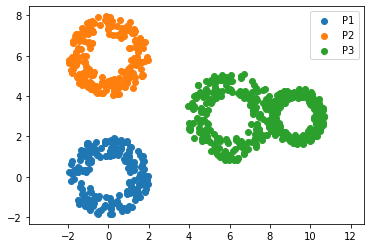

In [4]:
# plt.figure(figsize = (15,5))
plt.scatter(P1[:,0],P1[:,1], label = 'P1')
plt.scatter(P2[:,0],P2[:,1], label = 'P2')
plt.scatter(P3[:,0],P3[:,1], label = 'P3')
plt.axis('equal')
plt.legend()

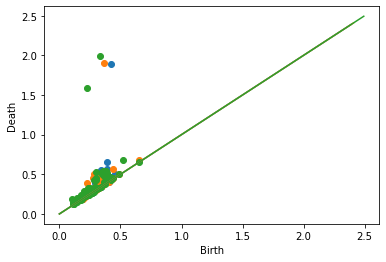

In [9]:
# Compute their diagrams 
diagrams1 = ripser.ripser(P1)['dgms']
diagrams2 = ripser.ripser(P2)['dgms']
diagrams3 = ripser.ripser(P3)['dgms']

Draw.drawDgm(diagrams1[1])
Draw.drawDgm(diagrams2[1])
Draw.drawDgm(diagrams3[1])
# Draw.drawDgm(diagrams1[0])

In [12]:
# Compute bottleneck distance using scikit-tda

# nek = persim.bottleneck(diagrams1[1], diagrams2[1], matching=True)
nek = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
dis, arr = nek
print(dis)
# help(persim.__doc__())
# print(persim.__doc__())
import sys
sys.executable
type(persim.bottleneck)
# print(persim.bottleneck.__doc__)
print(diagrams1[0].shape, diagrams1[1].shape)

0.6805447712540627
(200, 2) (36, 2)


The bottleneck distance is 0.6805447712540627


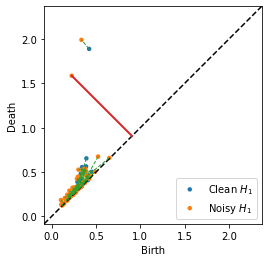

In [13]:
# Compute bottleneck of P1 and P3
distance_bottleneck, matching = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams3[1], matching=matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)
# print(persim.visuals.bottleneck.__doc__)
# print(persim.visuals.bottleneck_matching.__doc__)